<a href="https://colab.research.google.com/github/matheusbuenowb/University-Network-Analysis/blob/main/TCC_An%C3%A1lise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise dos dados


#Estatísticas Gerais (ANÁLISE DESCARTADA)


Análise Geral:
Velocidade Máxima de Download: 732 Mbps
Velocidade Mínima de Download: 0 Mbps
Velocidade Máxima de Upload: 309 Mbps
Velocidade Mínima de Upload: 0 Mbps
Latência Máxima: 150 ms
Latência Mínima: 4 ms
Jitter Máximo: 114.96
Jitter Mínimo: 0.09

Média de Download: 196.26 Mbps
Média de Upload: 141.30 Mbps
Média de Latência: 20.01 ms
Média de Jitter: 3.90 ms
Amplitude da velocidade de Download: 732 Mbps
Amplitude da velocidade de Upload: 309 Mbps
Amplitude da Latência: 146 ms
Amplitude do Jitter: 114.86999999999999 ms

Variância da taxa de transmissão de download: 17057.78
Desvio padrão da taxa de transmissão de download: 130.61
Mediana da taxa de transmissão de download: 181.00
Moda de Download: 92 Mbps

Variância da taxa de transmissão de upload: 4756.42
Desvio padrão da taxa de transmissão de upload: 68.97
Mediana da taxa de transmissão de upload: 136.00
Moda de Upload: 93 Mbps

Variância da latência: 90.55
Desvio padrão da latência: 9.52
Mediana da latência: 19.00
Moda de L

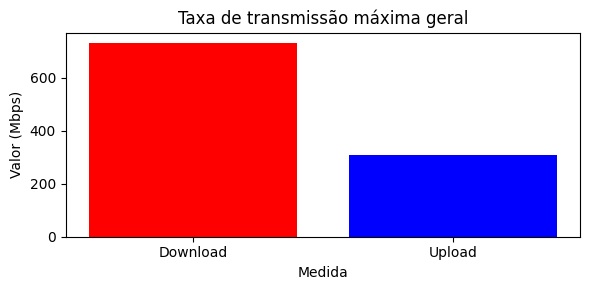

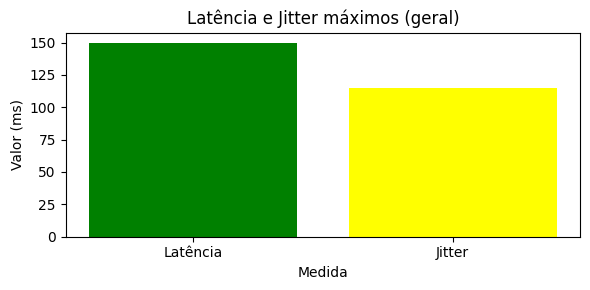

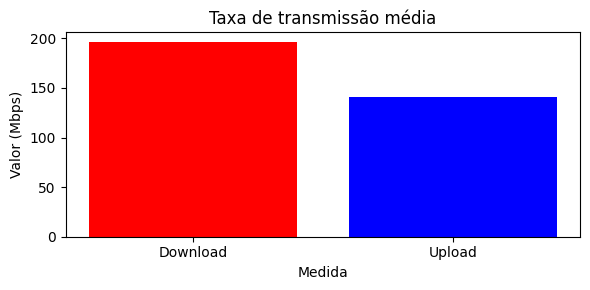

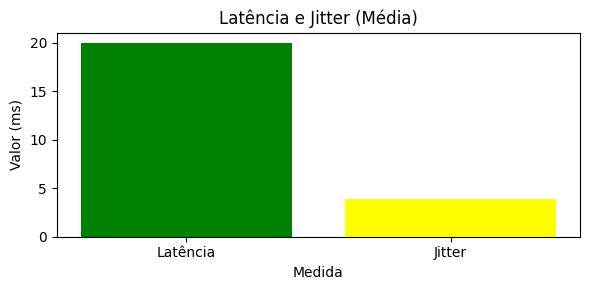

In [ ]:
import pandas as pd

data = pd.read_csv('/content/TestesAmostras100.csv', delimiter=',')

data.describe()

import pandas as pd
import matplotlib.pyplot as plt

#Velocidades máximas, mínimas e média de download e upload
max_download = data['Download'].max()
min_download = data['Download'].min()
average_download = data['Download'].mean()
max_upload = data['Upload'].max()
min_upload = data['Upload'].min()
average_upload = data['Upload'].mean()

#Latência máxima, mínima e média
max_latency = data['Latência'].max()
min_latency = data['Latência'].min()
average_latency = data['Latência'].mean()

#Jitter máximo, mínimo e médio
max_jitter = data['Jitter'].max()
min_jitter = data['Jitter'].min()
average_jitter = data['Jitter'].mean()

#Variância de download
variance_download = data['Download'].var()

#Desvio padrão
std_download = data['Download'].std()

#Mediana
median_download = data['Download'].median()

variance_upload = data['Upload'].var()
std_upload = data['Upload'].std()
median_upload = data['Upload'].median()

variance_latencia = data['Latência'].var()
std_latencia = data['Latência'].std()
median_latencia = data['Latência'].median()

variance_jitter = data['Jitter'].var()
std_jitter = data['Jitter'].std()
median_jitter = data['Jitter'].median()

#Coeficientes de variação
cv_download = (data['Download'].std() / data['Download'].mean()) * 100
cv_upload = (data['Upload'].std() / data['Upload'].mean()) * 100
cv_latencia = (data['Latência'].std() / data['Latência'].mean()) * 100
cv_jitter = (data['Jitter'].std() / data['Jitter'].mean()) * 100

moda_download = data['Download'].mode()[0]
moda_upload = data['Upload'].mode()[0]
moda_latencia = data['Latência'].mode()[0]
moda_jitter = data['Jitter'].mode()[0]

# Imprimir os resultados
print('Análise Geral:')
print(f'Velocidade Máxima de Download: {max_download} Mbps')
print(f'Velocidade Mínima de Download: {min_download} Mbps')
print(f'Velocidade Máxima de Upload: {max_upload} Mbps')
print(f'Velocidade Mínima de Upload: {min_upload} Mbps')
print(f'Latência Máxima: {max_latency} ms')
print(f'Latência Mínima: {min_latency} ms')
print(f'Jitter Máximo: {max_jitter}')
print(f'Jitter Mínimo: {min_jitter}\n')
print(f'Média de Download: {average_download:.2f} Mbps')
print(f'Média de Upload: {average_upload:.2f} Mbps')
print(f'Média de Latência: {average_latency:.2f} ms')
print(f'Média de Jitter: {average_jitter:.2f} ms')
print(f'Amplitude da velocidade de Download: {max_download - min_download} Mbps')
print(f'Amplitude da velocidade de Upload: {max_upload - min_upload} Mbps')
print(f'Amplitude da Latência: {max_latency - min_latency} ms')
print(f'Amplitude do Jitter: {max_jitter - min_jitter} ms\n')

print(f"Variância da taxa de transmissão de download: {variance_download:.2f}")
print(f"Desvio padrão da taxa de transmissão de download: {std_download:.2f}")
print(f"Mediana da taxa de transmissão de download: {median_download:.2f}")
print('Moda de Download:', moda_download, 'Mbps\n')

print(f"Variância da taxa de transmissão de upload: {variance_upload:.2f}")
print(f"Desvio padrão da taxa de transmissão de upload: {std_upload:.2f}")
print(f"Mediana da taxa de transmissão de upload: {median_upload:.2f}")
print('Moda de Upload:', moda_upload, 'Mbps\n')

print(f"Variância da latência: {variance_latencia:.2f}")
print(f"Desvio padrão da latência: {std_latencia:.2f}")
print(f"Mediana da latência: {median_latencia:.2f}")
print('Moda de Latência:', moda_latencia, 'ms\n')

print(f"Variância do jitter: {variance_jitter:.2f}")
print(f"Desvio padrão do jitter: {std_jitter:.2f}")
print(f"Mediana do jitter: {median_jitter:.2f}")
print('Moda de Jitter:', moda_jitter, 'ms\n')


print(f'Coeficiente de Variação para Download: {cv_download:.2f}')
print(f'Coeficiente de Variação para Upload: {cv_upload:.2f}')
print(f'Coeficiente de Variação para Latência: {cv_latencia:.2f}')
print(f'Coeficiente de Variação para Jitter: {cv_jitter:.2f}')


# Gerando alguns gráficos
valores = [max_download, max_upload]
labels = ['Download',
          'Upload',]

plt.figure(figsize=(6, 3))
plt.bar(labels, valores, color=['red', 'blue', 'green', 'yellow'])
plt.xlabel('Medida')
plt.ylabel('Valor (Mbps)')
plt.title('Taxa de transmissão máxima geral')
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

valores = [max_latency,max_jitter]
labels = ['Latência',
          'Jitter']

plt.figure(figsize=(6, 3))
plt.bar(labels, valores, color=['green', 'yellow'])
plt.xlabel('Medida')
plt.ylabel('Valor (ms)')
plt.title('Latência e Jitter máximos (geral)')
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


valores = [average_download, average_upload]
labels = ['Download',
          'Upload']

plt.figure(figsize=(6, 3))
plt.bar(labels, valores, color=['red', 'blue', 'green', 'yellow'])
plt.xlabel('Medida')
plt.ylabel('Valor (Mbps)')
plt.title('Taxa de transmissão média')
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


valores = [average_latency, average_jitter]
labels = ['Latência',
          'Jitter']

plt.figure(figsize=(6, 3))
plt.bar(labels, valores, color=['green', 'yellow'])
plt.xlabel('Medida')
plt.ylabel('Valor (ms)')
plt.title('Latência e Jitter (Média)')
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#top_50_download = data.nsmallest(50, 'Download')['Download']
#top_50_upload = data.nsmallest(50, 'Upload')['Upload']


#Análise por blocos, salas e por períodos (ANÁLISE DESCARTADA)






#Análise por bloco e meio de transmissão

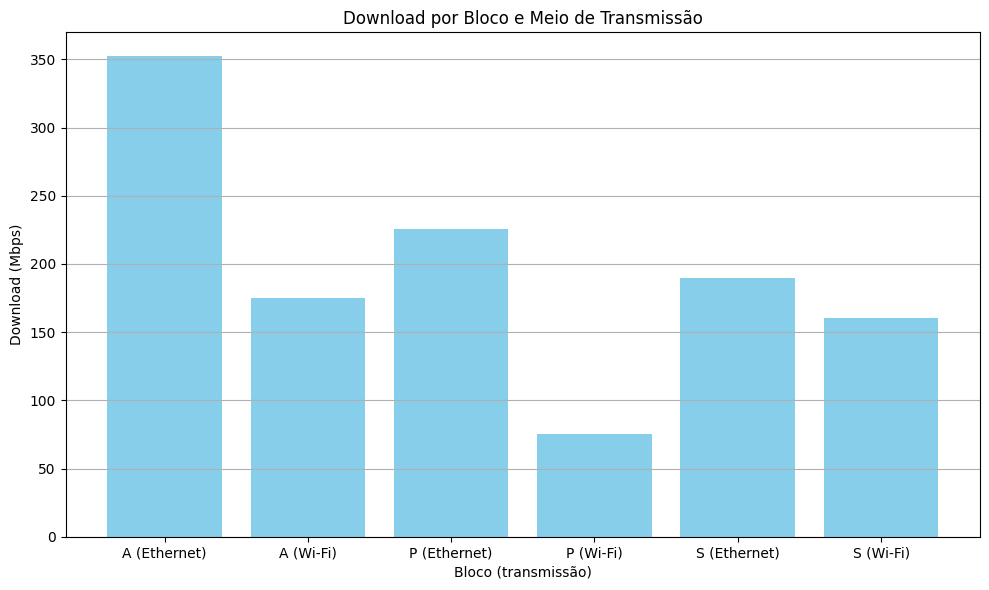

Tabela de Resultados para Download:

  Bloco Transmissão Download
0     A    Ethernet   352.19
1     A       Wi-Fi   175.15
2     P    Ethernet   225.41
3     P       Wi-Fi    75.39
4     S    Ethernet   189.37
5     S       Wi-Fi   160.07


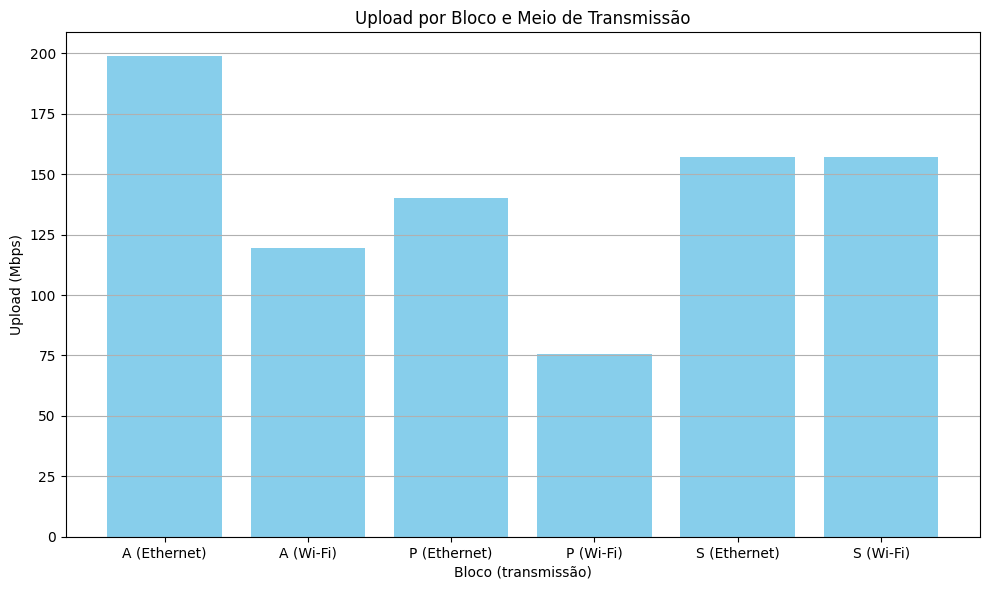

Tabela de Resultados para Upload:

  Bloco Transmissão  Upload
0     A    Ethernet  198.74
1     A       Wi-Fi  119.36
2     P    Ethernet  140.00
3     P       Wi-Fi   75.48
4     S    Ethernet  157.06
5     S       Wi-Fi  157.15


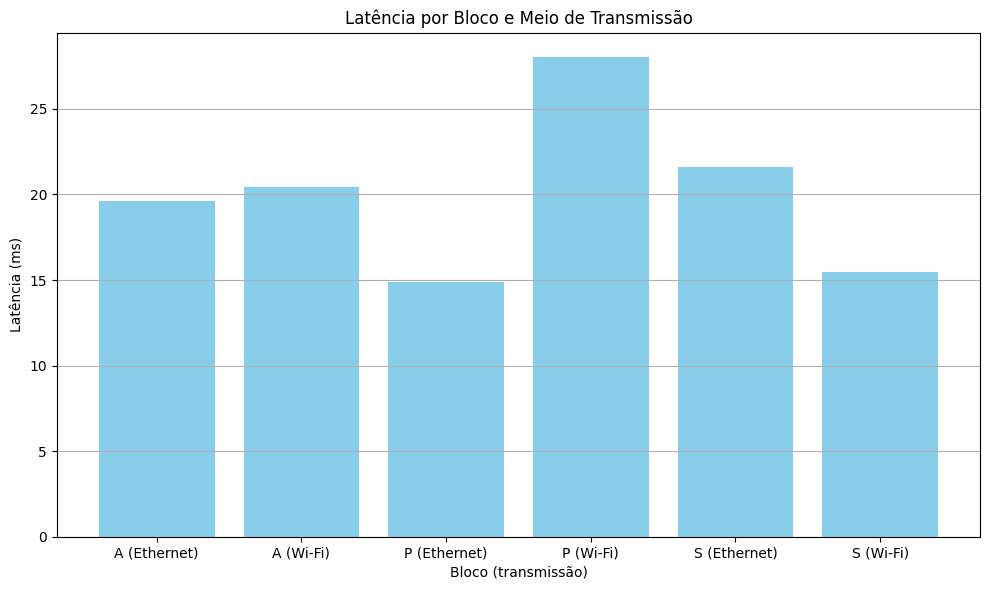

Tabela de Resultados para Latência:

  Bloco Transmissão Latência
0     A    Ethernet    19.63
1     A       Wi-Fi    20.46
2     P    Ethernet    14.88
3     P       Wi-Fi    28.04
4     S    Ethernet    21.59
5     S       Wi-Fi    15.45


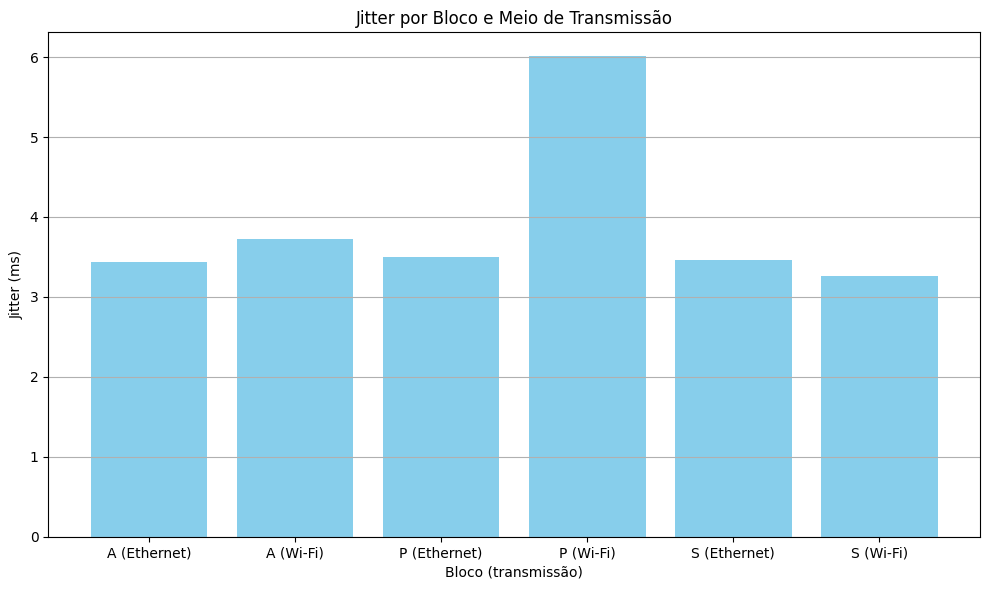

Tabela de Resultados para Jitter:

  Bloco Transmissão Jitter
0     A    Ethernet   3.44
1     A       Wi-Fi   3.73
2     P    Ethernet   3.50
3     P       Wi-Fi   6.01
4     S    Ethernet   3.46
5     S       Wi-Fi   3.27


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#data = pd.read_csv('Testes.csv', delimiter=',')
data = pd.read_csv('/content/TestesAmostras100.csv', delimiter=',')

# Agrupamento por bloco e meio de transmissão e calcular as médias de Download, Upload, Ping e Jitter para cada grupo
#grouped_data = data.groupby(['Bloco', 'Transmissão']).mean()[['Download', 'Upload', 'Latência', 'Jitter']].reset_index()

grouped_data = data.pivot_table(index=['Bloco', 'Transmissão'],
                                values=['Download', 'Upload', 'Latência', 'Jitter'],
                                aggfunc='mean').reset_index()

#Gerando gráficos por bloco e meio de transmissão
metrics = ['Download', 'Upload', 'Latência', 'Jitter']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(grouped_data)), grouped_data[metric], color='skyblue')
    plt.xlabel('Bloco (transmissão)')
    if(metric == 'Download' or metric == 'Upload'):
      plt.ylabel(metric + " (Mbps)")
    else:
      plt.ylabel(metric + " (ms)")
    plt.title(f'{metric} por Bloco e Meio de Transmissão')
    plt.xticks(range(len(grouped_data)), [f'{row["Bloco"]} ({row["Transmissão"]})' for index, row in grouped_data.iterrows()])
    #plt.xticks(range(len(grouped_data)), [f'{row["Bloco"]} ({row["Transmissão"]})' for index, row in grouped_data.iterrows()], rotation=45)
    #Linha comentada com o design de rotação 45º
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    print(f'Tabela de Resultados para {metric}:\n')
    results = grouped_data.applymap(lambda x: '{:.2f}'.format(x) if isinstance(x, (int, float)) else str(x))
    columns = ['Bloco', 'Transmissão', metric]
    print(results[columns])
    plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/TestesAmostras100.csv', delimiter=',')

#Análise por bloco, meio de transmissão e período dia

<ipython-input-39-ca25eaa1544c>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Periodo'] = pd.cut(pd.to_datetime(data['Horário']).dt.hour,


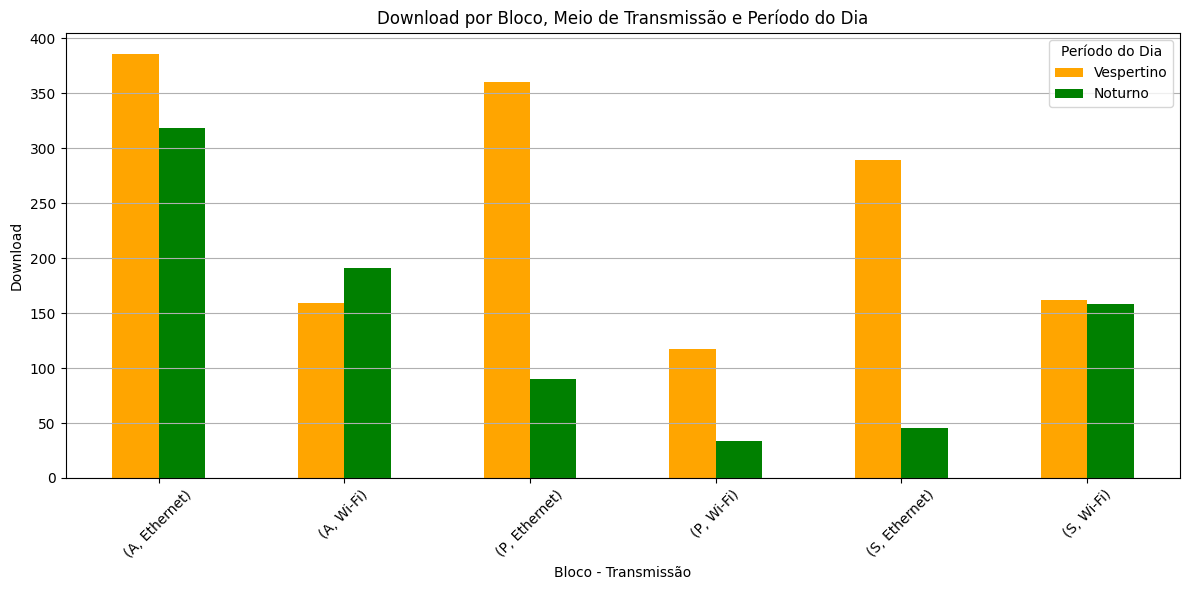

Resultados para a média de taxa de transmissão de Download (Megabits):

Periodo            Vespertino  Noturno
Bloco Transmissão                     
A     Ethernet         385.78   318.61
      Wi-Fi            159.38   190.92
P     Ethernet         360.53    90.28
      Wi-Fi            117.20    33.59
S     Ethernet         289.14    45.79
      Wi-Fi            162.16   157.99


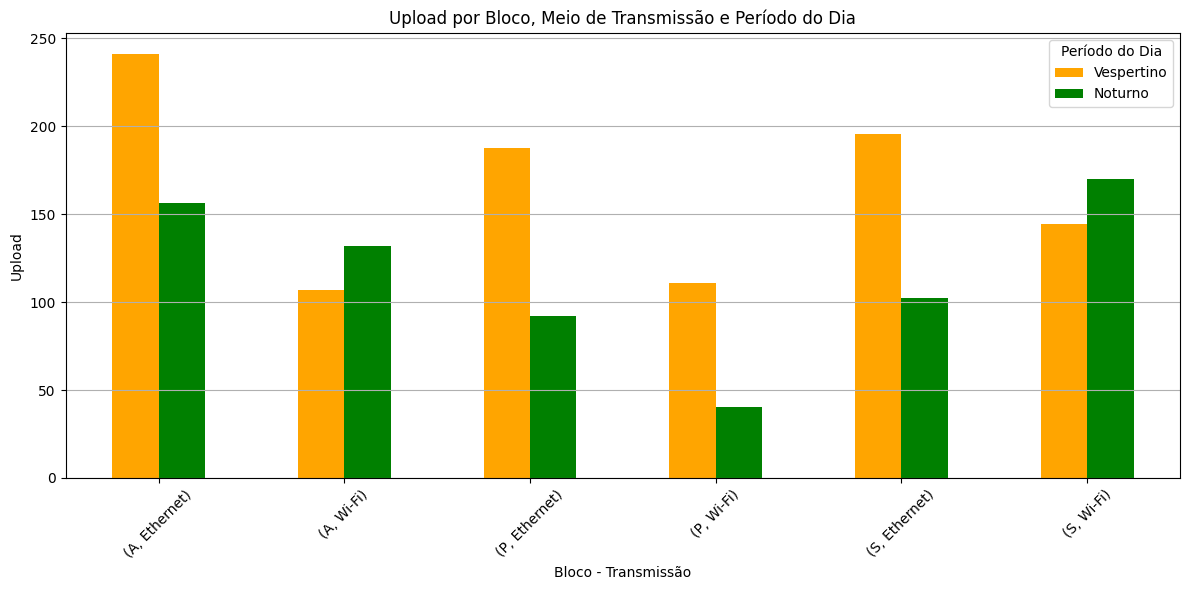

Resultados para a média de taxa de transmissão de Upload (Megabits):

Periodo            Vespertino  Noturno
Bloco Transmissão                     
A     Ethernet         241.02   156.46
      Wi-Fi            106.66   132.07
P     Ethernet         187.85    92.16
      Wi-Fi            110.81    40.16
S     Ethernet         195.28   102.07
      Wi-Fi            144.41   169.89


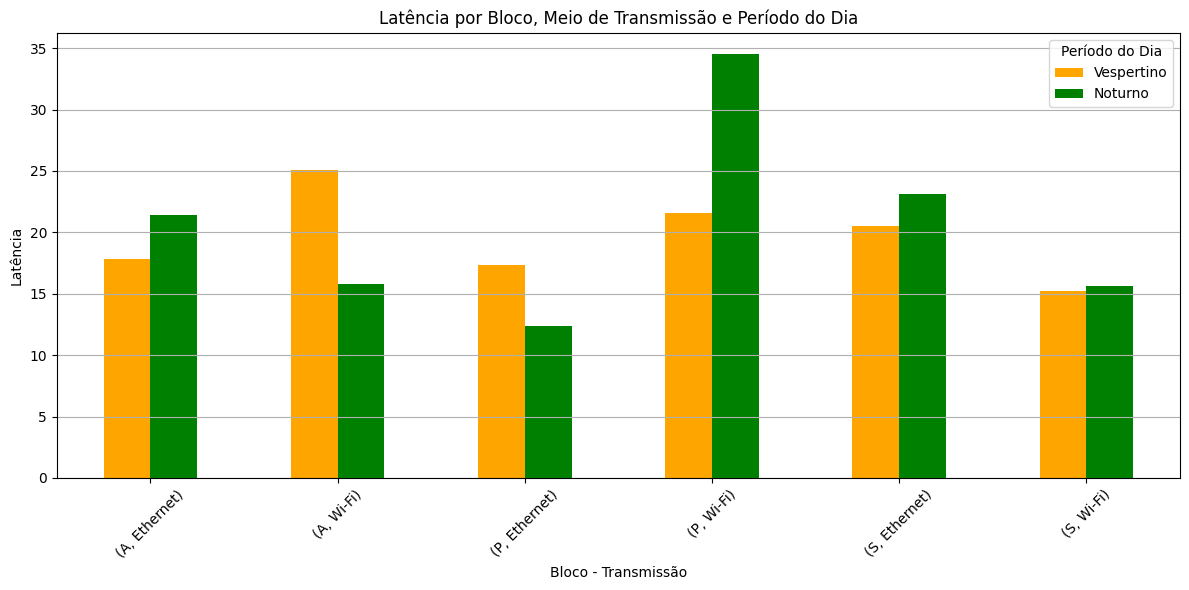

Resultados para a média de tempo de resposta de Latência (Ms):

Periodo            Vespertino  Noturno
Bloco Transmissão                     
A     Ethernet          17.86    21.40
      Wi-Fi             25.11    15.81
P     Ethernet          17.35    12.41
      Wi-Fi             21.56    34.52
S     Ethernet          20.55    23.10
      Wi-Fi             15.25    15.64


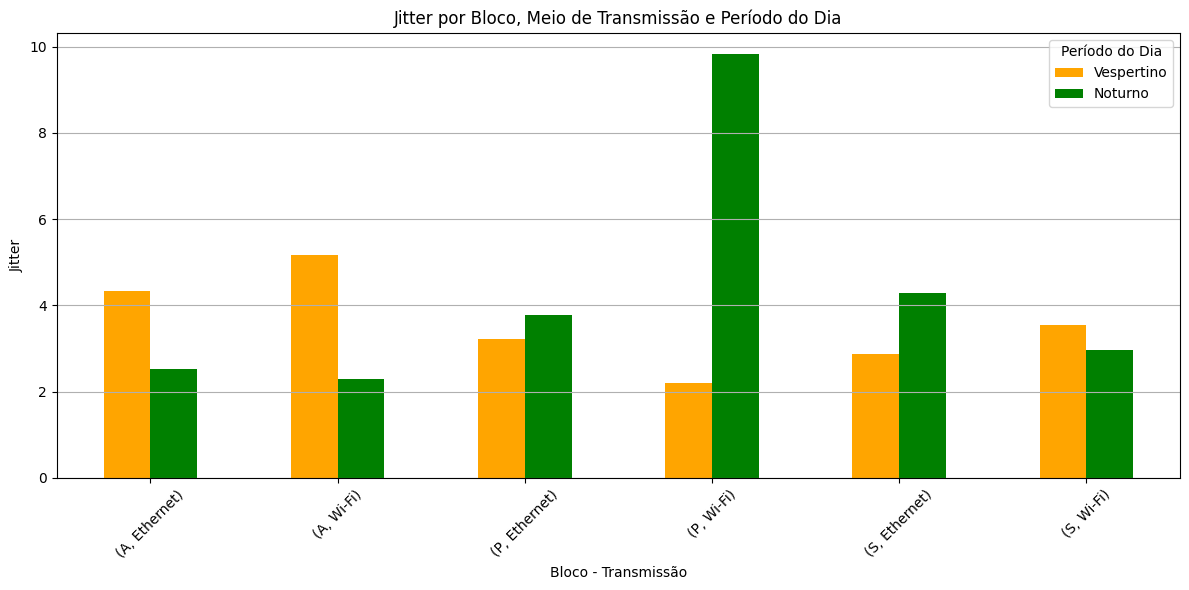

Resultados para a média de tempo de resposta de Jitter (Ms):

Periodo            Vespertino  Noturno
Bloco Transmissão                     
A     Ethernet           4.35     2.54
      Wi-Fi              5.17     2.29
P     Ethernet           3.22     3.78
      Wi-Fi              2.19     9.83
S     Ethernet           2.88     4.29
      Wi-Fi              3.56     2.98


In [ ]:
#É adicionada uma nova coluna para representar o período do dia
data['Periodo'] = pd.cut(pd.to_datetime(data['Horário']).dt.hour,
                         bins=[0, 6, 12, 18, 24],
                         labels=['Madrugada', 'Matutino', 'Vespertino', 'Noturno'])

#Aqui os dados são agrupados por bloco, meio de transmissão e período do dia, e calcular as médias
grouped_data = data.pivot_table(index=['Bloco', 'Transmissão', 'Periodo'],
                                values=['Download', 'Upload', 'Latência', 'Jitter'],
                                aggfunc='mean').reset_index()

metrics = ['Download', 'Upload', 'Latência', 'Jitter']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    grouped_data_pivot = grouped_data.pivot_table(index=['Bloco', 'Transmissão'], columns='Periodo', values=metric)
    grouped_data_pivot.plot(kind='bar', rot=45, ax=plt.gca(), color = ['orange', 'green'])
    plt.xlabel('Bloco - Transmissão')
    plt.ylabel(metric)
    plt.title(f'{metric} por Bloco, Meio de Transmissão e Período do Dia')
    plt.legend(title='Período do Dia')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    grouped_data_pivot = grouped_data_pivot.round(2)

    if(metric == 'Download' or metric == 'Upload'):
      print(f'Resultados para a média de taxa de transmissão de {metric} (Megabits):\n')
    else:
      print(f'Resultados para a média de tempo de resposta de {metric} (Ms):\n')
    print(grouped_data_pivot)
    plt.show()


#Análise por bloco, meio de transmissão Ethernet e período dia

<ipython-input-38-3b26af2d89ab>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Periodo'] = pd.cut(pd.to_datetime(data['Horário']).dt.hour,


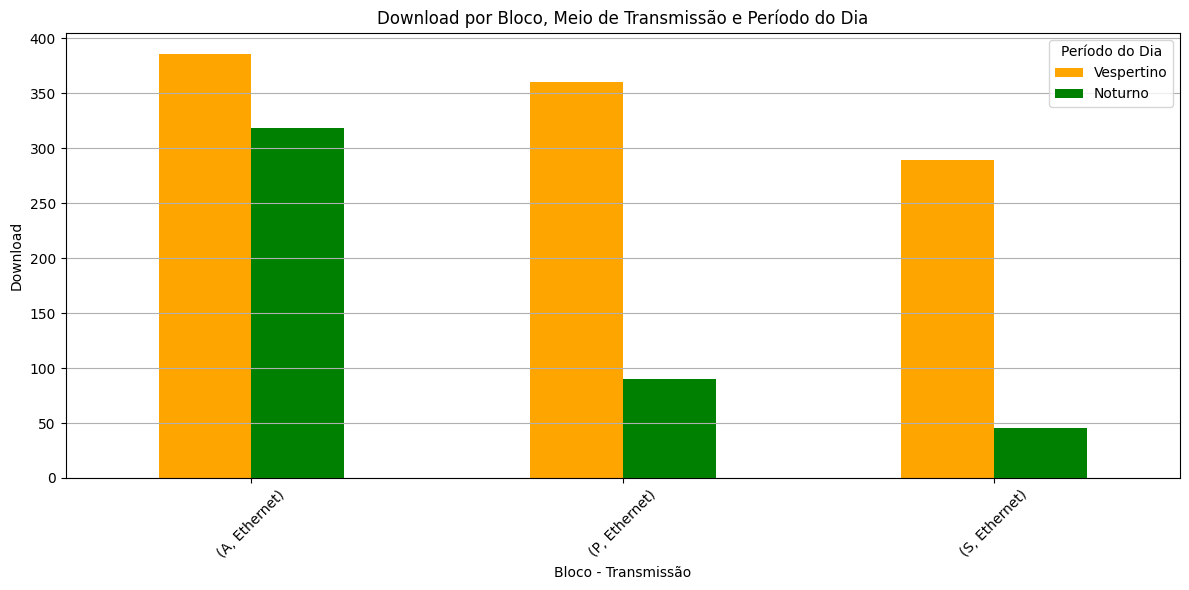

Resultados para a média de taxa de transmissão de Download (Megabits):

Periodo            Vespertino  Noturno
Bloco Transmissão                     
A     Ethernet         385.78   318.61
P     Ethernet         360.53    90.28
S     Ethernet         289.14    45.79


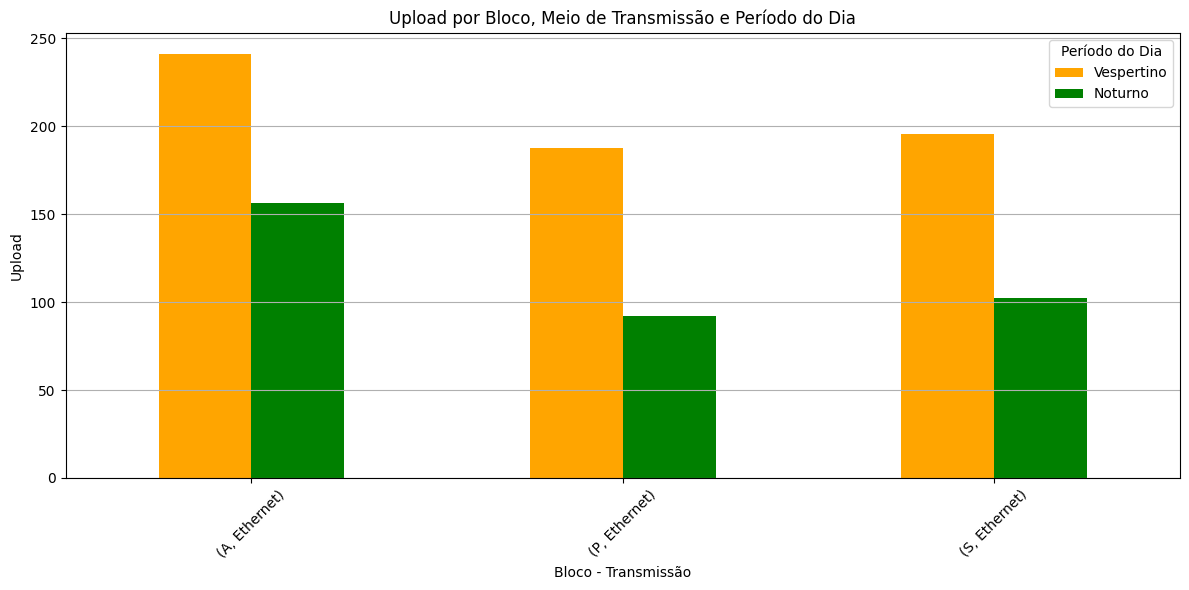

Resultados para a média de taxa de transmissão de Upload (Megabits):

Periodo            Vespertino  Noturno
Bloco Transmissão                     
A     Ethernet         241.02   156.46
P     Ethernet         187.85    92.16
S     Ethernet         195.28   102.07


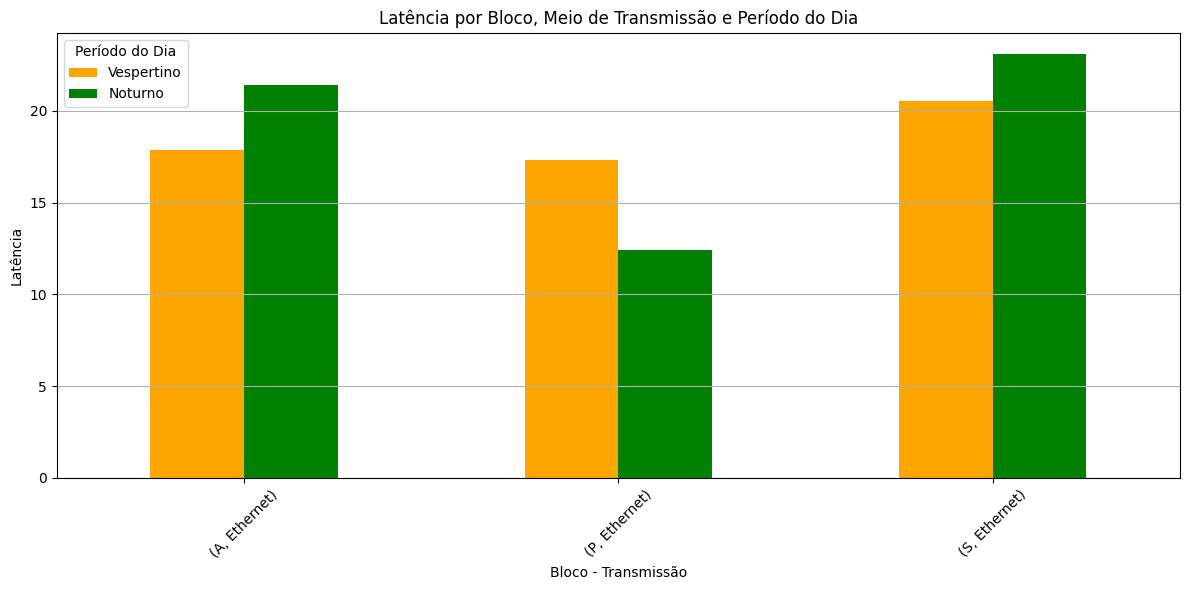

Resultados para a média de tempo de resposta de Latência (Ms):

Periodo            Vespertino  Noturno
Bloco Transmissão                     
A     Ethernet          17.86    21.40
P     Ethernet          17.35    12.41
S     Ethernet          20.55    23.10


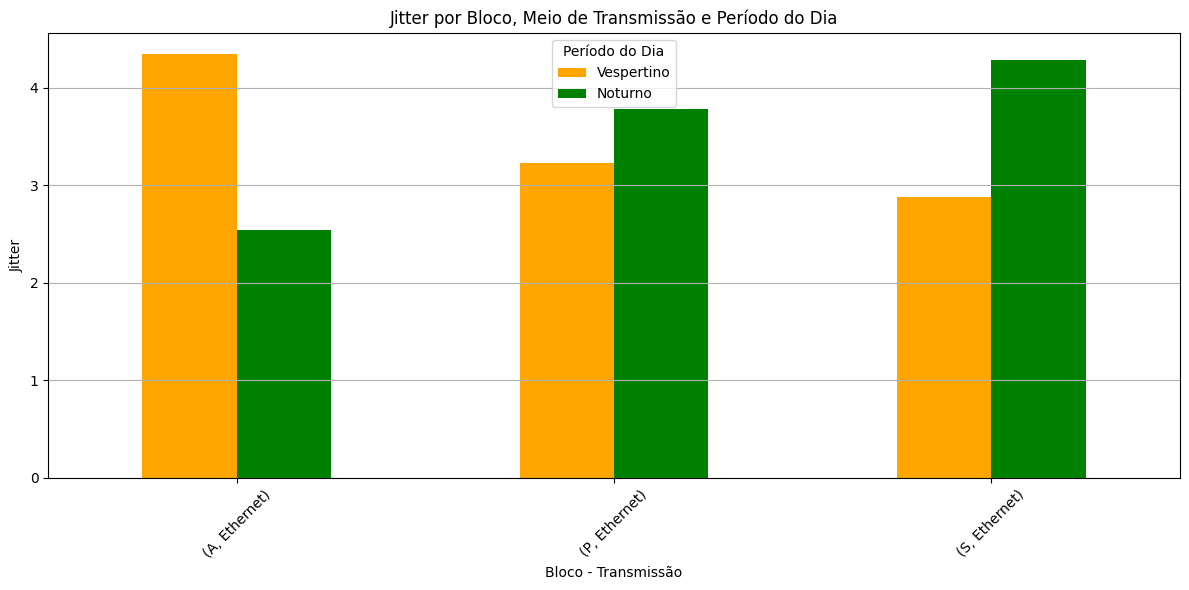

Resultados para a média de tempo de resposta de Jitter (Ms):

Periodo            Vespertino  Noturno
Bloco Transmissão                     
A     Ethernet           4.35     2.54
P     Ethernet           3.22     3.78
S     Ethernet           2.88     4.29


In [ ]:
#Adicionando uma nova coluna para representar o período do dia
data['Periodo'] = pd.cut(pd.to_datetime(data['Horário']).dt.hour,
                         bins=[0, 6, 12, 18, 24],
                         labels=['Madrugada', 'Matutino', 'Vespertino', 'Noturno'])

#Agrupando os dados por bloco, meio de transmissão e período do dia, e calcular as médias

#grouped_data = data.groupby(['Bloco', 'Transmissão', 'Periodo']).mean()[['Download', 'Upload', 'Latência', 'Jitter']].reset_index()

ethernet_data = data[data['Transmissão'] == 'Ethernet']
grouped_data = ethernet_data.pivot_table(index=['Bloco', 'Transmissão', 'Periodo'],
                                values=['Download', 'Upload', 'Latência', 'Jitter'],
                                aggfunc='mean').reset_index()

#plt.bar(range(len(grouped_data)), grouped_data[metric], color='blue')

metrics = ['Download', 'Upload', 'Latência', 'Jitter']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    grouped_data_pivot = grouped_data.pivot_table(index=['Bloco', 'Transmissão'], columns='Periodo', values=metric)
    grouped_data_pivot.plot(kind='bar', rot=45, ax=plt.gca(), color = ['orange', 'green'])
    plt.xlabel('Bloco - Transmissão')
    plt.ylabel(metric)
    plt.title(f'{metric} por Bloco, Meio de Transmissão e Período do Dia')
    plt.legend(title='Período do Dia')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Imprimir tabela de resultados
    #print(f'Tabela de Resultados para {metric}:\n')
    #print(tabulate(grouped_data_pivot.applymap(lambda x: '{:.2f}'.format(x)), headers='keys', tablefmt='grid'))
    #plt.show()

    grouped_data_pivot = grouped_data_pivot.round(2)

    if(metric == 'Download' or metric == 'Upload'):
      print(f'Resultados para a média de taxa de transmissão de {metric} (Megabits):\n')
    else:
      print(f'Resultados para a média de tempo de resposta de {metric} (Ms):\n')
    print(grouped_data_pivot)
    plt.show()


#Conclusões em construção

Como foi possível perceber, no bloco A as taxas de transmissões de download e upload foram superiores aos blocos P e S, onde a diferença é maior ainda comparando entre os períodos noturno. Pode-se inferir que este motivo esteja relacionado ao fato de que no Bloco A a prevalência de salas teóricas sejam maior do que laboratórios, onde possuem computadores que são utilizados pelos discentes. Além disso, é importante destacar que os curso bacharelado de Engenharia de Software e tecnólogo de Análise e Desenvolvimento de Sistemas possuem grande parte de suas aulas situadas no bloco P, o que contribui para que a qualidade de conexão seja inferior neste bloco.

Quanto ao quesito latência e jitter, não houveram significativas diferenças, o que é esperado dado ao meio de transmissão Ethernet ser excelente.


<ipython-input-37-830257e056a4>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Periodo'] = pd.cut(pd.to_datetime(data['Horário']).dt.hour,


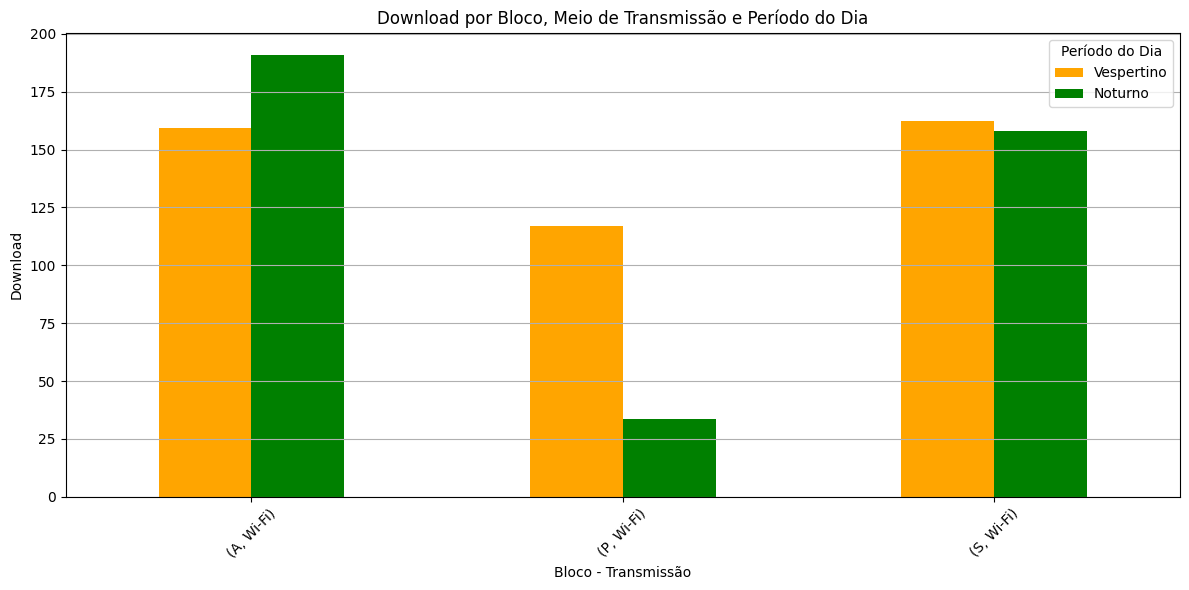

Resultados para a média de taxa de transmissão de Download (Megabits):

Periodo            Vespertino  Noturno
Bloco Transmissão                     
A     Wi-Fi            159.38   190.92
P     Wi-Fi            117.20    33.59
S     Wi-Fi            162.16   157.99


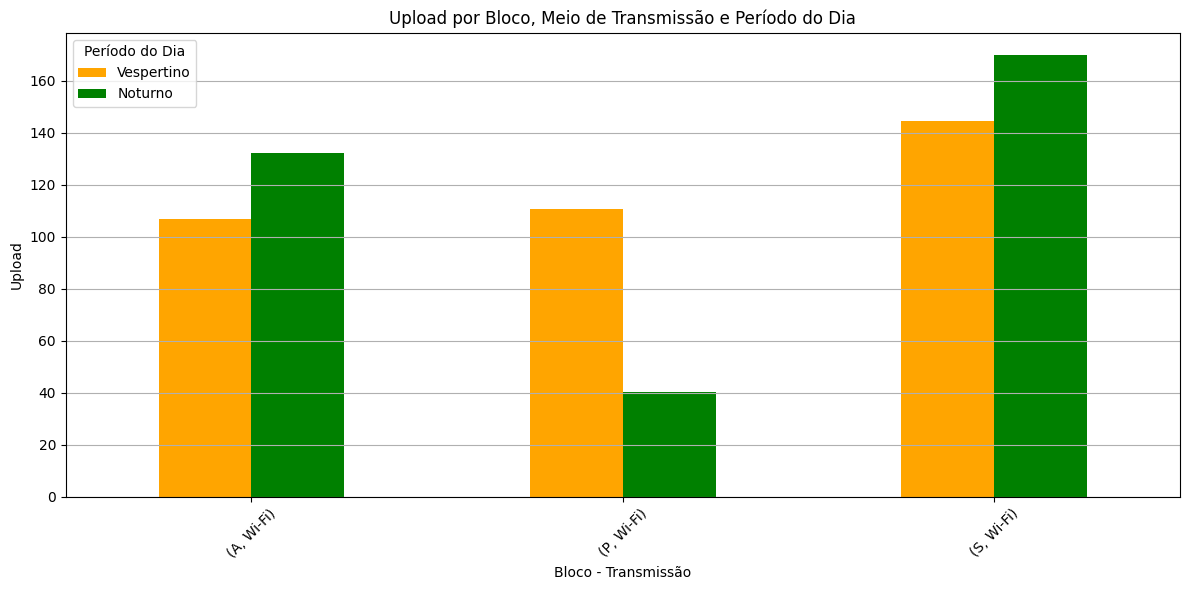

Resultados para a média de taxa de transmissão de Upload (Megabits):

Periodo            Vespertino  Noturno
Bloco Transmissão                     
A     Wi-Fi            106.66   132.07
P     Wi-Fi            110.81    40.16
S     Wi-Fi            144.41   169.89


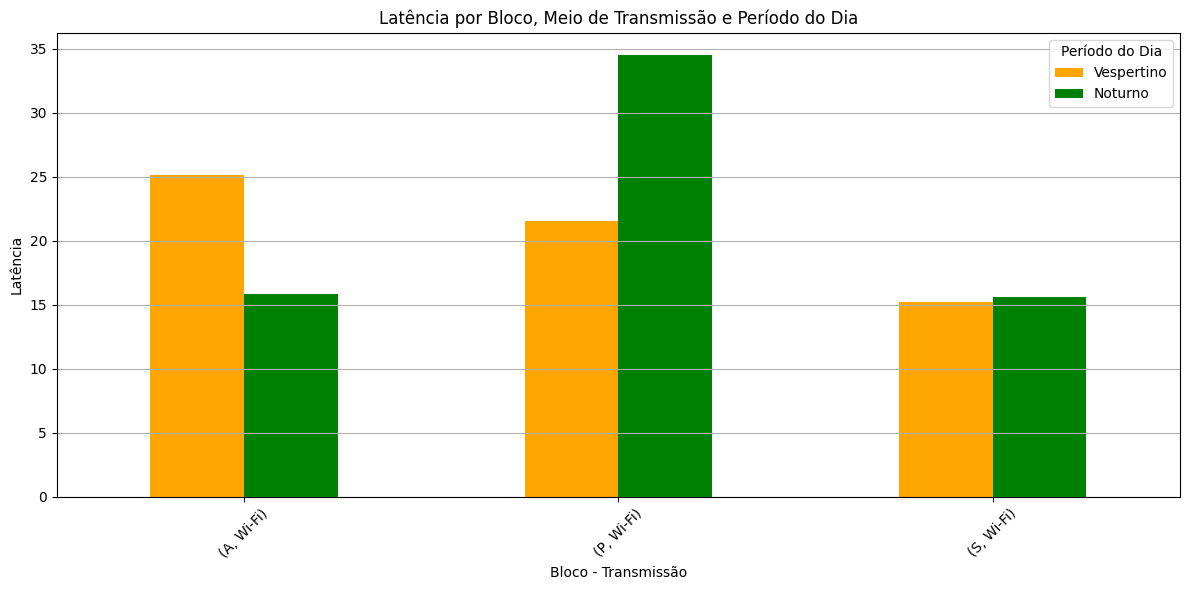

Resultados para a média de tempo de resposta de Latência (Ms):

Periodo            Vespertino  Noturno
Bloco Transmissão                     
A     Wi-Fi             25.11    15.81
P     Wi-Fi             21.56    34.52
S     Wi-Fi             15.25    15.64


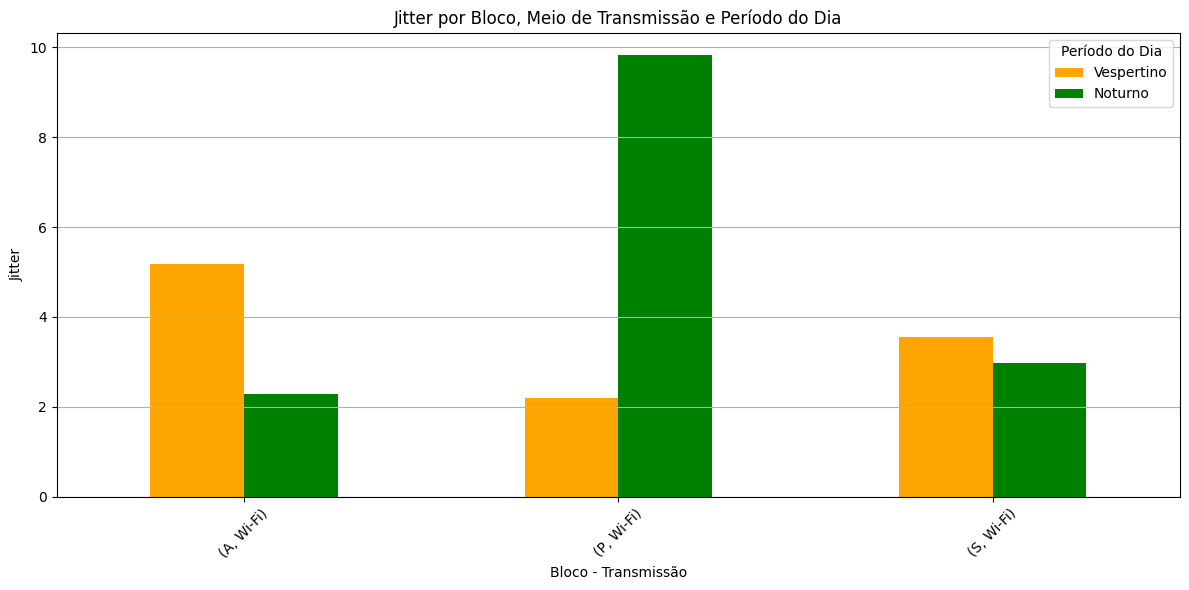

Resultados para a média de tempo de resposta de Jitter (Ms):

Periodo            Vespertino  Noturno
Bloco Transmissão                     
A     Wi-Fi              5.17     2.29
P     Wi-Fi              2.19     9.83
S     Wi-Fi              3.56     2.98


In [ ]:
#Adicionando uma nova coluna para representar o período do dia
data['Periodo'] = pd.cut(pd.to_datetime(data['Horário']).dt.hour,
                         bins=[0, 6, 12, 18, 24],
                         labels=['Madrugada', 'Matutino', 'Vespertino', 'Noturno'])

#Agrupando os dados por bloco, meio de transmissão e período do dia, e calcular as médias

#grouped_data = data.groupby(['Bloco', 'Transmissão', 'Periodo']).mean()[['Download', 'Upload', 'Latência', 'Jitter']].reset_index()

wi_fi_data = data[data['Transmissão'] == 'Wi-Fi']
grouped_data = wi_fi_data.pivot_table(index=['Bloco', 'Transmissão', 'Periodo'],
                                values=['Download', 'Upload', 'Latência', 'Jitter'],
                                aggfunc='mean').reset_index()


#plt.bar(range(len(grouped_data)), grouped_data[metric], color='blue')

metrics = ['Download', 'Upload', 'Latência', 'Jitter']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    grouped_data_pivot = grouped_data.pivot_table(index=['Bloco', 'Transmissão'], columns='Periodo', values=metric)
    grouped_data_pivot.plot(kind='bar', rot=45, ax=plt.gca(), color = ['orange', 'green'])
    plt.xlabel('Bloco - Transmissão')
    plt.ylabel(metric)
    plt.title(f'{metric} por Bloco, Meio de Transmissão e Período do Dia')
    plt.legend(title='Período do Dia')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # Imprimir tabela de resultados
    #print(f'Tabela de Resultados para {metric}:\n')
    #print(tabulate(grouped_data_pivot.applymap(lambda x: '{:.2f}'.format(x)), headers='keys', tablefmt='grid'))
    #plt.show()

    grouped_data_pivot = grouped_data_pivot.round(2)

    if(metric == 'Download' or metric == 'Upload'):
      print(f'Resultados para a média de taxa de transmissão de {metric} (Megabits):\n')
    else:
      print(f'Resultados para a média de tempo de resposta de {metric} (Ms):\n')
    print(grouped_data_pivot)
    plt.show()

#Conclusões em construção

Como foi possível perceber, no meio de transmissão de Wi-Fi o bloco S se sobressaiu melhor na maioria dos resultados.

Quanto ao quesito latência e jitter, no meio de transmissão Wi-Fi também não houveram significativas diferenças, com exceção do experimento noturno no Bloco P. Isto pode ser esperado, dado que o meio de transmissão Wi-Fi pode ser considerado instável por haver uma maior chance de interferências eletromagnéticas, sejam por sinais de outras redes como também de redes móveis ou tecnologias similares (Bluetooth).

#Análise da variância, desvio padrão e mediana por experimento

In [ ]:
import itertools

metricas = ['Download', 'Upload', 'Latência', 'Jitter']
medidas = ['Variação', 'Desvio Padrão', 'Mediana']

# dicionário para armazenar os resultados
resultados_dict = {}

Bloco = ['A', 'P', 'S']
Periodo = ['Vespertino', 'Noturno']
Transmissao = ['Ethernet', 'Wi-Fi']

combinacoes = list(itertools.product(Bloco, Periodo, Transmissao))

resultados_experimento_df = []

# Loop para calcular as estatísticas para cada métrica
for Bloco, Periodo, Transmissao in combinacoes:
  for metrica in metricas:
      #Passa pelos níveis
      experiment_data = data[(data['Bloco'] == Bloco) &
                            (data['Periodo'] == Periodo) &
                            (data['Transmissão'] == Transmissao)]

      variancia = experiment_data[metrica].var().round(2)
      desvio_padrao = experiment_data[metrica].std().round(2)
      mediana = experiment_data[metrica].median().round(2)

      #Adiciona os resultados ao dic
      resultados_dict[metrica] = [variancia, desvio_padrao, mediana]
  print('Resultados do Experimento (Bloco ' + Bloco + ', Período ' + Periodo +
        ', Meio de transmissão ' + Transmissao + ')')
  resultados_experimento_df.append(pd.DataFrame(resultados_dict, index=medidas))


#armazena os dados em um novo df
#resultados_experimento_df = pd.DataFrame(resultados_dict, index=medidas)

# Exibir o DataFrame
#print('Resultados do Experimento:')


Resultados do Experimento (Bloco A, Período Vespertino, Meio de transmissão Ethernet)
Resultados do Experimento (Bloco A, Período Vespertino, Meio de transmissão Wi-Fi)
Resultados do Experimento (Bloco A, Período Noturno, Meio de transmissão Ethernet)
Resultados do Experimento (Bloco A, Período Noturno, Meio de transmissão Wi-Fi)
Resultados do Experimento (Bloco P, Período Vespertino, Meio de transmissão Ethernet)
Resultados do Experimento (Bloco P, Período Vespertino, Meio de transmissão Wi-Fi)
Resultados do Experimento (Bloco P, Período Noturno, Meio de transmissão Ethernet)
Resultados do Experimento (Bloco P, Período Noturno, Meio de transmissão Wi-Fi)
Resultados do Experimento (Bloco S, Período Vespertino, Meio de transmissão Ethernet)
Resultados do Experimento (Bloco S, Período Vespertino, Meio de transmissão Wi-Fi)
Resultados do Experimento (Bloco S, Período Noturno, Meio de transmissão Ethernet)
Resultados do Experimento (Bloco S, Período Noturno, Meio de transmissão Wi-Fi)


In [ ]:
print('Bloco A \nPeríodo Vespertino\nMeio de transmissão Ethernet')
resultados_experimento_df[0]

Bloco A 
Período Vespertino
Meio de transmissão Ethernet


,Download,Upload,Latência,Jitter
Variação,8824.17,4423.86,27.43,3.66
Desvio Padrão,93.94,66.51,5.24,1.91
Mediana,395.50,269.00,18.00,4.20


In [ ]:
print('Bloco A\nPeríodo Vespertino\nMeio de transmissão Wi-Fi')
resultados_experimento_df[1]

Bloco A
Período Vespertino
Meio de transmissão Wi-Fi


,Download,Upload,Latência,Jitter
Variação,2903.01,2336.87,44.79,8.25
Desvio Padrão,53.88,48.34,6.69,2.87
Mediana,177.50,125.00,24.00,4.68


In [ ]:
print('Bloco A\nPeríodo Noturno\nMeio de transmissão Ethernet')
resultados_experimento_df[2]

Bloco A
Período Noturno
Meio de transmissão Ethernet


,Download,Upload,Latência,Jitter
Variação,1146.28,138.61,10.65,1.30
Desvio Padrão,33.86,11.77,3.26,1.14
Mediana,322.00,161.50,21.00,2.45


In [ ]:
print('Bloco A\nPeríodo Noturno\nMeio de transmissão Wi-Fi')
resultados_experimento_df[3]

Bloco A
Período Noturno
Meio de transmissão Wi-Fi


,Download,Upload,Latência,Jitter
Variação,3460.86,1704.25,30.14,1.04
Desvio Padrão,58.83,41.28,5.49,1.02
Mediana,209.50,149.00,15.00,2.16


In [ ]:
print('Bloco P\nPeríodo Vespertino\nMeio de transmissão Ethernet')
resultados_experimento_df[4]

Bloco P
Período Vespertino
Meio de transmissão Ethernet


,Download,Upload,Latência,Jitter
Variação,6711.77,2806.05,42.25,2.25
Desvio Padrão,81.93,52.97,6.50,1.50
Mediana,365.00,165.00,19.50,3.08


In [ ]:
print('Bloco P\nPeríodo Vespertino\nMeio de transmissão Wi-Fi')
resultados_experimento_df[5]

Bloco P
Período Vespertino
Meio de transmissão Wi-Fi


,Download,Upload,Latência,Jitter
Variação,1298.18,579.00,5.54,1.69
Desvio Padrão,36.03,24.06,2.35,1.30
Mediana,92.00,94.00,21.00,1.87


In [ ]:
print('Bloco P\nPeríodo Noturno\nMeio de transmissão Ethernet')
resultados_experimento_df[6]

Bloco P
Período Noturno
Meio de transmissão Ethernet


,Download,Upload,Latência,Jitter
Variação,13.82,41.79,15.70,2.52
Desvio Padrão,3.72,6.46,3.96,1.59
Mediana,92.00,94.00,12.00,3.75


In [ ]:
print('Bloco P\nPeríodo Noturno\nMeio de transmissão Wi-Fi')
resultados_experimento_df[7]

Bloco P
Período Noturno
Meio de transmissão Wi-Fi


,Download,Upload,Latência,Jitter
Variação,886.33,805.39,426.31,158.86
Desvio Padrão,29.77,28.38,20.65,12.60
Mediana,22.00,40.50,30.00,7.26


In [ ]:
print('Bloco S\nPeríodo Vespertino\nMeio de transmissão Ethernet')
resultados_experimento_df[8]

Bloco S
Período Vespertino
Meio de transmissão Ethernet


,Download,Upload,Latência,Jitter
Variação,14558.76,7183.23,54.63,2.25
Desvio Padrão,120.66,84.75,7.39,1.50
Mediana,309.00,138.00,18.50,2.50


In [ ]:
print('Bloco S\nPeríodo Vespertino\nMeio de transmissão Wi-Fi')
resultados_experimento_df[9]

Bloco S
Período Vespertino
Meio de transmissão Wi-Fi


,Download,Upload,Latência,Jitter
Variação,3145.15,1977.13,26.43,3.25
Desvio Padrão,56.08,44.46,5.14,1.80
Mediana,177.00,142.00,15.00,3.33


In [ ]:
print('Bloco S\nPeríodo Noturno\nMeio de transmissão Ethernet')
resultados_experimento_df[10]

Bloco S
Período Noturno
Meio de transmissão Ethernet


,Download,Upload,Latência,Jitter
Variação,3863.50,568.34,14.36,6.23
Desvio Padrão,62.16,23.84,3.79,2.50
Mediana,12.00,92.00,23.00,4.02


In [ ]:
print('Bloco S\nPeríodo Noturno\nMeio de transmissão Wi-Fi')
resultados_experimento_df[11]

Bloco S
Período Noturno
Meio de transmissão Wi-Fi


,Download,Upload,Latência,Jitter
Variação,1693.59,781.05,9.44,2.66
Desvio Padrão,41.15,27.95,3.07,1.63
Mediana,161.50,175.00,15.00,2.66


#Gráfico de dispersão em cada experimento (Descartado)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import itertools

#data = pd.read_csv('/content/TestesAmostras100.csv', delimiter=',')

#Gerando um gráfico de dispersão para analisar a relação entre Download e Upload com linha de tendência

Bloco = ['A', 'P', 'S']
Periodo = ['Vespertino', 'Noturno']
Transmissao = ['Ethernet', 'Wi-Fi']

combinacoes = list(itertools.product(Bloco, Periodo, Transmissao))

resultados_experimento_df = []

for Bloco, Periodo, Transmissao in combinacoes:

  data_experiment = data[(data['Bloco'] == Bloco) & (data['Periodo'] == Periodo) & (data['Transmissão'] == Transmissao)]

  plt.figure(figsize=(8, 6))
  plt.scatter(data_experiment['Download'], data_experiment['Upload'], alpha=0.5, color='blue', label='Dados')
  slope, intercept, r_value, p_value, std_err = linregress(data_experiment['Download'], data_experiment['Upload'])
  plt.plot(data_experiment['Download'], intercept + slope * data_experiment['Download'], color='red', label='Linha de Tendência')
  plt.title('Gráfico de Dispersão: Download x Upload')
  plt.xlabel('Download (Megabits)')
  plt.ylabel('Upload (Megabits)')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()


  # Dispersão: Latência x Jitter
  plt.figure(figsize=(8, 6))
  plt.scatter(data_experiment['Latência'], data_experiment['Jitter'], alpha=0.5, color='green')
  slope, intercept, r_value, p_value, std_err = linregress(data_experiment['Latência'], data_experiment['Jitter'])
  plt.plot(data_experiment['Latência'], intercept + slope * data_experiment['Latência'], color='red', label='Linha de Tendência')
  plt.title('Gráfico de Dispersão: Latência x Jitter')
  plt.xlabel('Latência (ms)')
  plt.ylabel('Jitter (ms)')
  plt.grid(True)
  plt.tight_layout()
  plt.show()

In [ ]:
#Agrupando os dados por bloco, meio de transmissão e período do dia, e calcular as médias

#grouped_data = data.groupby(['Bloco', 'Transmissão', 'Periodo']).mean()[['Download', 'Upload', 'Latência', 'Jitter']].reset_index()

#plt.bar(range(len(grouped_data)), grouped_data[metric], color='blue')




    # Imprimir tabela de resultados
    #print(f'Tabela de Resultados para {metric}:\n')
    #print(tabulate(grouped_data_pivot.applymap(lambda x: '{:.2f}'.format(x)), headers='keys', tablefmt='grid'))
    #plt.show()